In [50]:
import pandas as pd

# column = 'race'
# group1 = 'white'
# group2 = 'black'

# column = 'gender'
# group1 = 'male'
# group2 = 'female'

column = 'age'
group1 = 'child'
group2 = 'adult'

# column = 'edulevel'
# group1 = 'low'
# group2 = 'high'


file_path = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_{column}.csv'
df = pd.read_csv(file_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_gr1 = df[df['ptid_group'] == group1]
df_gr2 = df[df['ptid_group'] == group2]
df

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
0,27,0,27,adult,1.530347,3.854136,1.289434,1.287654
1,102,80,102,child,3.138799,3.778059,2.634110,2.573555
2,33,70,33,adult,1.764359,1.690459,1.600777,1.584263
3,93,20,93,child,3.186636,2.896262,2.710756,2.653104
4,143,20,143,adult,2.538419,2.522637,2.190819,2.182866
...,...,...,...,...,...,...,...,...
2250,217,60,217,adult,3.280882,2.917560,2.580173,2.573791
2251,168,50,168,adult,1.464972,1.931271,1.069707,1.071095
2252,231,70,231,child,2.711803,2.607788,2.349830,2.305733
2253,92,100,92,adult,1.498251,1.825728,1.400736,1.389065


In [51]:
import seaborn as sns

def calc_stats_results(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]

    # Initialize a list to store each row of the final DataFrame
    rows_list = []

    # Loop over each ratio_w value
    for ratio in df['ratio'].unique():
        # Filter the DataFrame for the current ratio
        df_ratio = df[df['ratio'] == ratio]
        
        # Initialize a dictionary to store the stats for the current ratio
        stats_dict = {'ratio': ratio}
        
        # Calculate the statistics for each RMSE column
        for col in rmse_columns:
            col_data = df_ratio[col].dropna()  # Exclude NaN values for the calculation
            mean = col_data.mean()
            median = col_data.median()
            std = col_data.std()
            # Confidence interval calculation
            ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
            ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
            
            # Store the statistics in the dictionary
            stats_dict[f'{col}_mean'] = mean
            stats_dict[f'{col}_median'] = median
            stats_dict[f'{col}_std'] = std
            stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
            stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

        # Append the stats for the current ratio to the rows_list
        rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_stats_gr1 = calc_stats_results(df_gr1)
df_stats_gr2 = calc_stats_results(df_gr2)

In [52]:
df_stats_gr1

,ratio,rmse_naive_mean,rmse_naive_median,rmse_naive_std,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_single_mean,rmse_single_median,rmse_single_std,rmse_single_95p_CI_Lower,...,rmse_base_mean,rmse_base_median,rmse_base_std,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_median,rmse_tl_std,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,80,2.773906,2.737699,0.612178,2.641403,2.90641,2.909307,2.818103,0.791357,2.738021,...,2.318420,2.319695,0.449015,2.221233,2.415608,2.289789,2.298599,0.436562,2.195296,2.384281
1,20,2.773906,2.737699,0.612178,2.641403,2.90641,2.962603,2.915504,0.743494,2.801677,...,2.394603,2.362564,0.592270,2.266409,2.522798,2.348278,2.314722,0.569390,2.225036,2.471520
2,40,2.773906,2.737699,0.612178,2.641403,2.90641,3.107319,2.998437,0.949492,2.901806,...,2.328710,2.357624,0.456095,2.229990,2.427430,2.291874,2.301076,0.439667,2.196710,2.387039
3,60,2.773906,2.737699,0.612178,2.641403,2.90641,2.975280,2.919593,0.818310,2.798160,...,2.325428,2.362415,0.454246,2.227108,2.423747,2.291106,2.307973,0.437726,2.196362,2.385850
4,90,2.773906,2.737699,0.612178,2.641403,2.90641,2.981094,2.887163,0.766561,2.815175,...,2.318401,2.302362,0.447897,2.221455,2.415346,2.290355,2.288301,0.434939,2.196214,2.384495
5,100,2.773906,2.737699,0.612178,2.641403,2.90641,3.021675,2.945491,0.925887,2.821270,...,2.319914,2.327120,0.447088,2.223143,2.416684,2.291121,2.301926,0.436179,2.196712,2.385530
6,10,2.773906,2.737699,0.612178,2.641403,2.90641,3.002701,2.983730,0.857261,2.817151,...,2.340865,2.371583,0.455845,2.242199,2.439531,2.295574,2.312113,0.438755,2.200608,2.390541
7,50,2.773906,2.737699,0.612178,2.641403,2.90641,2.990841,2.920001,0.873120,2.801858,...,2.326879,2.361948,0.452422,2.228954,2.424804,2.293126,2.316175,0.438689,2.198173,2.388078
8,0,2.773906,2.737699,0.612178,2.641403,2.90641,2.966450,2.933286,0.800382,2.793211,...,2.347479,2.377916,0.459999,2.247914,2.447044,2.296467,2.311830,0.438968,2.201454,2.391480
9,30,2.773906,2.737699,0.612178,2.641403,2.90641,2.975311,2.953250,0.800101,2.802133,...,2.335621,2.366604,0.459489,2.236167,2.435076,2.295472,2.308521,0.441172,2.199982,2.390962


In [53]:

# df_stats_gr2.rmse_single_mean.mean()
# df_stats_gr2.rmse_base_mean.mean()
df_stats_gr1.rmse_tl_mean.mean()

2.299713268403684

In [54]:
df

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
0,27,0,27,adult,1.530347,3.854136,1.289434,1.287654
1,102,80,102,child,3.138799,3.778059,2.634110,2.573555
2,33,70,33,adult,1.764359,1.690459,1.600777,1.584263
3,93,20,93,child,3.186636,2.896262,2.710756,2.653104
4,143,20,143,adult,2.538419,2.522637,2.190819,2.182866
...,...,...,...,...,...,...,...,...
2250,217,60,217,adult,3.280882,2.917560,2.580173,2.573791
2251,168,50,168,adult,1.464972,1.931271,1.069707,1.071095
2252,231,70,231,child,2.711803,2.607788,2.349830,2.305733
2253,92,100,92,adult,1.498251,1.825728,1.400736,1.389065


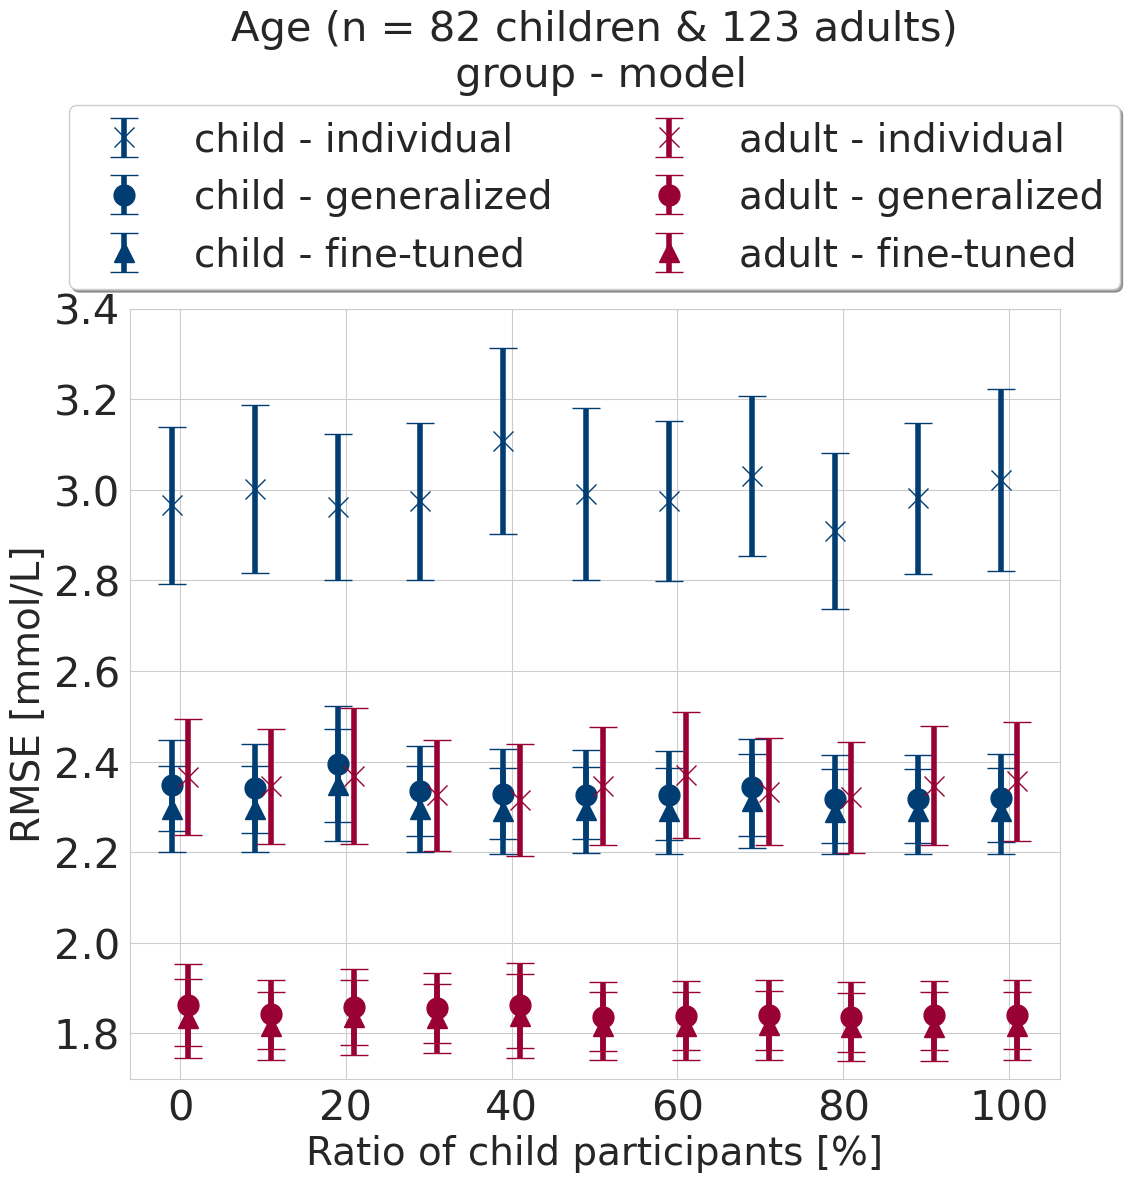

In [55]:
import matplotlib.pyplot as plt

file_name_with_extension = file_path.split("/")[-1]
file_name = file_name_with_extension.split(".")[0]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

rmse_col_gr1 = df_gr1['rmse_base']
rmse_col_gr2 = df_gr2['rmse_base']

rmse_col_tl_gr1 = df_gr1['rmse_tl']
rmse_col_tl_gr2 = df_gr2['rmse_tl']

rmse_col_gr1_single = df_gr1['rmse_single']
rmse_col_gr2_single = df_gr2['rmse_single']

gr1_color = "#003d73"
gr2_color = "#990033"
# gr1_color = "#D79B00"
# gr2_color = "#9673A6"
# gr3_color = "#21918c"
alpha_value = 0.5  # saturation
marker1 = "o"
marker2 = "^"
marker3 = "x"

y_group1 = df_stats_gr1['rmse_base_mean']
y_group2 = df_stats_gr2['rmse_base_mean']
y_group1_CI95_l = df_stats_gr1['rmse_base_95p_CI_Lower']
y_group1_CI95_u = df_stats_gr1['rmse_base_95p_CI_Upper']
y_group2_CI95_l = df_stats_gr2['rmse_base_95p_CI_Lower']
y_group2_CI95_u = df_stats_gr2['rmse_base_95p_CI_Upper']

y_group1_tl = df_stats_gr1['rmse_tl_mean']
y_group2_tl = df_stats_gr2['rmse_tl_mean']
y_group1_CI95_l_tl = df_stats_gr1['rmse_tl_95p_CI_Lower']
y_group1_CI95_u_tl = df_stats_gr1['rmse_tl_95p_CI_Upper']
y_group2_CI95_l_tl = df_stats_gr2['rmse_tl_95p_CI_Lower']
y_group2_CI95_u_tl = df_stats_gr2['rmse_tl_95p_CI_Upper']

y_group1_single = df_stats_gr1['rmse_single_mean']
y_group2_single = df_stats_gr2['rmse_single_mean']
y_group1_CI95_l_single = df_stats_gr1['rmse_single_95p_CI_Lower']
y_group1_CI95_u_single = df_stats_gr1['rmse_single_95p_CI_Upper']
y_group2_CI95_l_single = df_stats_gr2['rmse_single_95p_CI_Lower']
y_group2_CI95_u_single = df_stats_gr2['rmse_single_95p_CI_Upper']


offset = 1  # How much to offset the bars

x_values_gr1 = df_stats_gr1['ratio'] - offset
x_values_gr2 = df_stats_gr2['ratio'] + offset
x_tl_values_gr1 = df_stats_gr1['ratio'] - offset
x_tl_values_gr2 = df_stats_gr2['ratio'] + offset
x_single_values_gr1 = df_stats_gr1['ratio'] - offset
x_single_values_gr2 = df_stats_gr2['ratio'] + offset

# Calculate the errors from the means to the confidence interval limits
yerr_group1 = [y_group1 - y_group1_CI95_l, y_group1_CI95_u - y_group1]
yerr_group2 = [y_group2 - y_group2_CI95_l, y_group2_CI95_u - y_group2]

yerr_group1_tl = [y_group1_tl - y_group1_CI95_l_tl, y_group1_CI95_u_tl - y_group1_tl]
yerr_group2_tl = [y_group2_tl - y_group2_CI95_l_tl, y_group2_CI95_u_tl - y_group2_tl]


yerr_group1_single = [y_group1_single - y_group1_CI95_l_single, y_group1_CI95_u_single - y_group1_single]
yerr_group2_single = [y_group2_single - y_group2_CI95_l_single, y_group2_CI95_u_single - y_group2_single]




my_einwidth = 4

# Plot the single means with error bars
plt.errorbar(x=x_single_values_gr1, y=y_group1_single, yerr=yerr_group1_single, fmt=marker3, color=gr1_color, label=f'{group1} - individual', capsize=10, markersize=15, elinewidth=my_einwidth)
# Plot the means with error bars
plt.errorbar(x=x_values_gr1, y=y_group1, yerr=yerr_group1, fmt=marker1, color=gr1_color, label=f'{group1} - generalized', capsize=10, markersize=15, elinewidth=my_einwidth) # , elinewidth=10, markersize=15, capthick=10)
# Plot the transfer learning means with error bars
plt.errorbar(x=x_tl_values_gr1, y=y_group1_tl, yerr=yerr_group1_tl, fmt=marker2, color=gr1_color, label=f'{group1} - fine-tuned', capsize=10, markersize=15, elinewidth=my_einwidth)
# repeat for group 2
plt.errorbar(x=x_single_values_gr2, y=y_group2_single, yerr=yerr_group2_single, fmt=marker3, color=gr2_color, label=f'{group2} - individual', capsize=10, markersize=15, elinewidth=my_einwidth)
plt.errorbar(x=x_values_gr2, y=y_group2, yerr=yerr_group2, fmt=marker1, color=gr2_color, label=f'{group2} - generalized', capsize=10, markersize=15, elinewidth=my_einwidth) # elinewidth=10, markersize=14, capthick=10)
plt.errorbar(x=x_tl_values_gr2, y=y_group2_tl, yerr=yerr_group2_tl, fmt=marker2, color=gr2_color, label=f'{group2} - fine-tuned', capsize=10, markersize=15, elinewidth=my_einwidth)


# Set the legend and labels
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')#, title="RMSE",title_fontsize='25')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='28') # this was the last one I used!!!!!!!!
# plt.title(f'{file_name}: \n Mean RMSE and 95%CI', fontsize=30)
# plt.title(f'Race (n = 101 whites & 104 blacks)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
# plt.title(f'Sex (n = 88 males & 117 females)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
plt.title(f'Age (n = 82 children & 123 adults)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
# plt.suptitle('group - model', fontsize=30, va='center')
plt.xlabel(f'Ratio of {group1} participants [%]', fontsize=28)
plt.ylabel('RMSE [mmol/L]', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylim(bottom=1.7)
plt.ylim(top=3.4)
# plt.xticks(df_stats_gr1['ratio'])
# plt.text(53, 0.2, 'Average RMSEs across all ratios \n(mean[95% CI] mmol/L)\n     Before fine-tuning\n        White: 2.81[2.76, 2.85]\n        Black: 2.71[2.65, 2.77]\n     After fine-tuning\n        White: 2.06[2.04, 2.09]\n        Black: 2.00[1.98, 2.03]', fontsize=18,
#          bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
# plt.ylim(0, 3.5)



# Show the plot
# Get current axes


plt.show()

y_diff1 = y_group1-y_group1_tl
y_diff2 = y_diff1.mean()


y_diff3 = y_group2-y_group2_tl
y_diff4 = y_diff3.mean()

In [56]:
## Plot to compare to baseline

import numpy as np
# Define a function to create the plot based on the RMSE column names
def plot_rmse(df, df_stats, rmse_col_w, rmse_col_b, file_name, gr1_color = 'b', gr2_color = 'r'):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Group by ratio and calculate means
    df_mean = df.groupby('ratio')[[rmse_col_w, rmse_col_b]].mean().reset_index()

    # Get the mean and standard deviation values
    y_group1 = df_mean[rmse_col_w]
    y_group2 = df_mean[rmse_col_b]
    y_group1_CI95 = df_stats[rmse_col_w + '_std']
    y_group2_CI95 = df_stats[rmse_col_b + '_std']

    # Plot settings
    my_s = 150
    my_s2 = 100

    # Plot the means
    plt.scatter(x=df_mean['ratio'], y=y_group1, label=rmse_col_w, color=gr1_color, s=my_s)
    plt.scatter(x=df_mean['ratio'], y=y_group2, label=rmse_col_b, color=gr2_color, s=my_s)

    # Plot the standard deviations
    plt.scatter(x=df_mean['ratio'], y=y_group1 - y_group1_CI95, color=gr1_color, marker='_', s=my_s2, label = f'std of {rmse_col_w}:')
    plt.scatter(x=df_mean['ratio'], y=y_group1 + y_group1_CI95, color=gr1_color, marker='_', s=my_s2)
    plt.scatter(x=df_mean['ratio'], y=y_group2 - y_group2_CI95, color=gr2_color, marker='_', s=my_s2, label = f'std of {rmse_col_b}:')
    plt.scatter(x=df_mean['ratio'], y=y_group2 + y_group2_CI95, color=gr2_color, marker='_', s=my_s2)

    # Set the legend and labels
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')
    plt.title(f'{file_name}: \n Mean RMSE and Standard Deviation of {rmse_col_w} and {rmse_col_b}', fontsize=30)
    plt.xlabel('Ratio', fontsize=24)
    plt.ylabel('Mean RMSE', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Show the plot
    plt.show()

  


# plotting baselines to see if my model performs better then the naive approach
# rmse_pairs_base = [
#     ('rmse_base_w', 'rmse_w'),
#     ('rmse_base_b', 'rmse_b'),
#     ('rmse_base_tl_w', 'rmse_tlw_w'),
#     ('rmse_base_tl_b', 'rmse_tlw_b'),
#     ('rmse_base_tl_w', 'rmse_tlb_w'),
#     ('rmse_base_tl_b', 'rmse_tlb_b')
# ]

# for rmse_w, rmse_b in rmse_pairs_base:
#     plot_rmse(df, df_stats, rmse_w, rmse_b, file_name, gr1_color='g')



# #%% plot predictions

# # Assuming you want values for a specific PtID
# desired_ptID = 'your_target_ptID'

# # Accessing the values directly
# percentage, value = dictionary[desired_ptID]

# # Accessing the specific values for the desired PtID
# y_actual_w = value['y_test_w']




